## <span id="sec1"></span> **1. Loading the Dataset**

In [149]:
# Necessary imports librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils_stats import cramers_v
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv("./_attachments/datasets/Customer-Churn-Records.csv", sep=',')
tarjet = "Exited"

print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## <span id="sec1"></span> **2 ExploratoryAnalysis**

### <span id="sec21"></span> **2.1 Dataset structure**

In [151]:
print("Dataset structure:", df.shape)
print("Columns: ", df.columns)
print("Obetive variable: ", tarjet)
df[tarjet].value_counts()

Dataset structure: (10000, 18)
Columns:  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')
Obetive variable:  Exited


Exited
0    7962
1    2038
Name: count, dtype: int64

### <span id="sec22"></span> **2.2 Frequency analysis**

In [152]:
print("Statistical description of the variables:")
print(df.describe())

Statistical description of the variables:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584   

### <span id="sec23"></span> **2.3 Descriptive statistics**

In [153]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [154]:
for col in df.columns:
    print(f"\n========== {col} ==========")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")


========== RowNumber ==========
Number of unique values: 10000
Unique values: [    1     2     3 ...  9998  9999 10000]

========== CustomerId ==========
Number of unique values: 10000
Unique values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]

========== Surname ==========
Number of unique values: 2932
Unique values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

========== CreditScore ==========
Number of unique values: 460
Unique values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539

### <span id="sec24"></span> **2.4 Correlations**

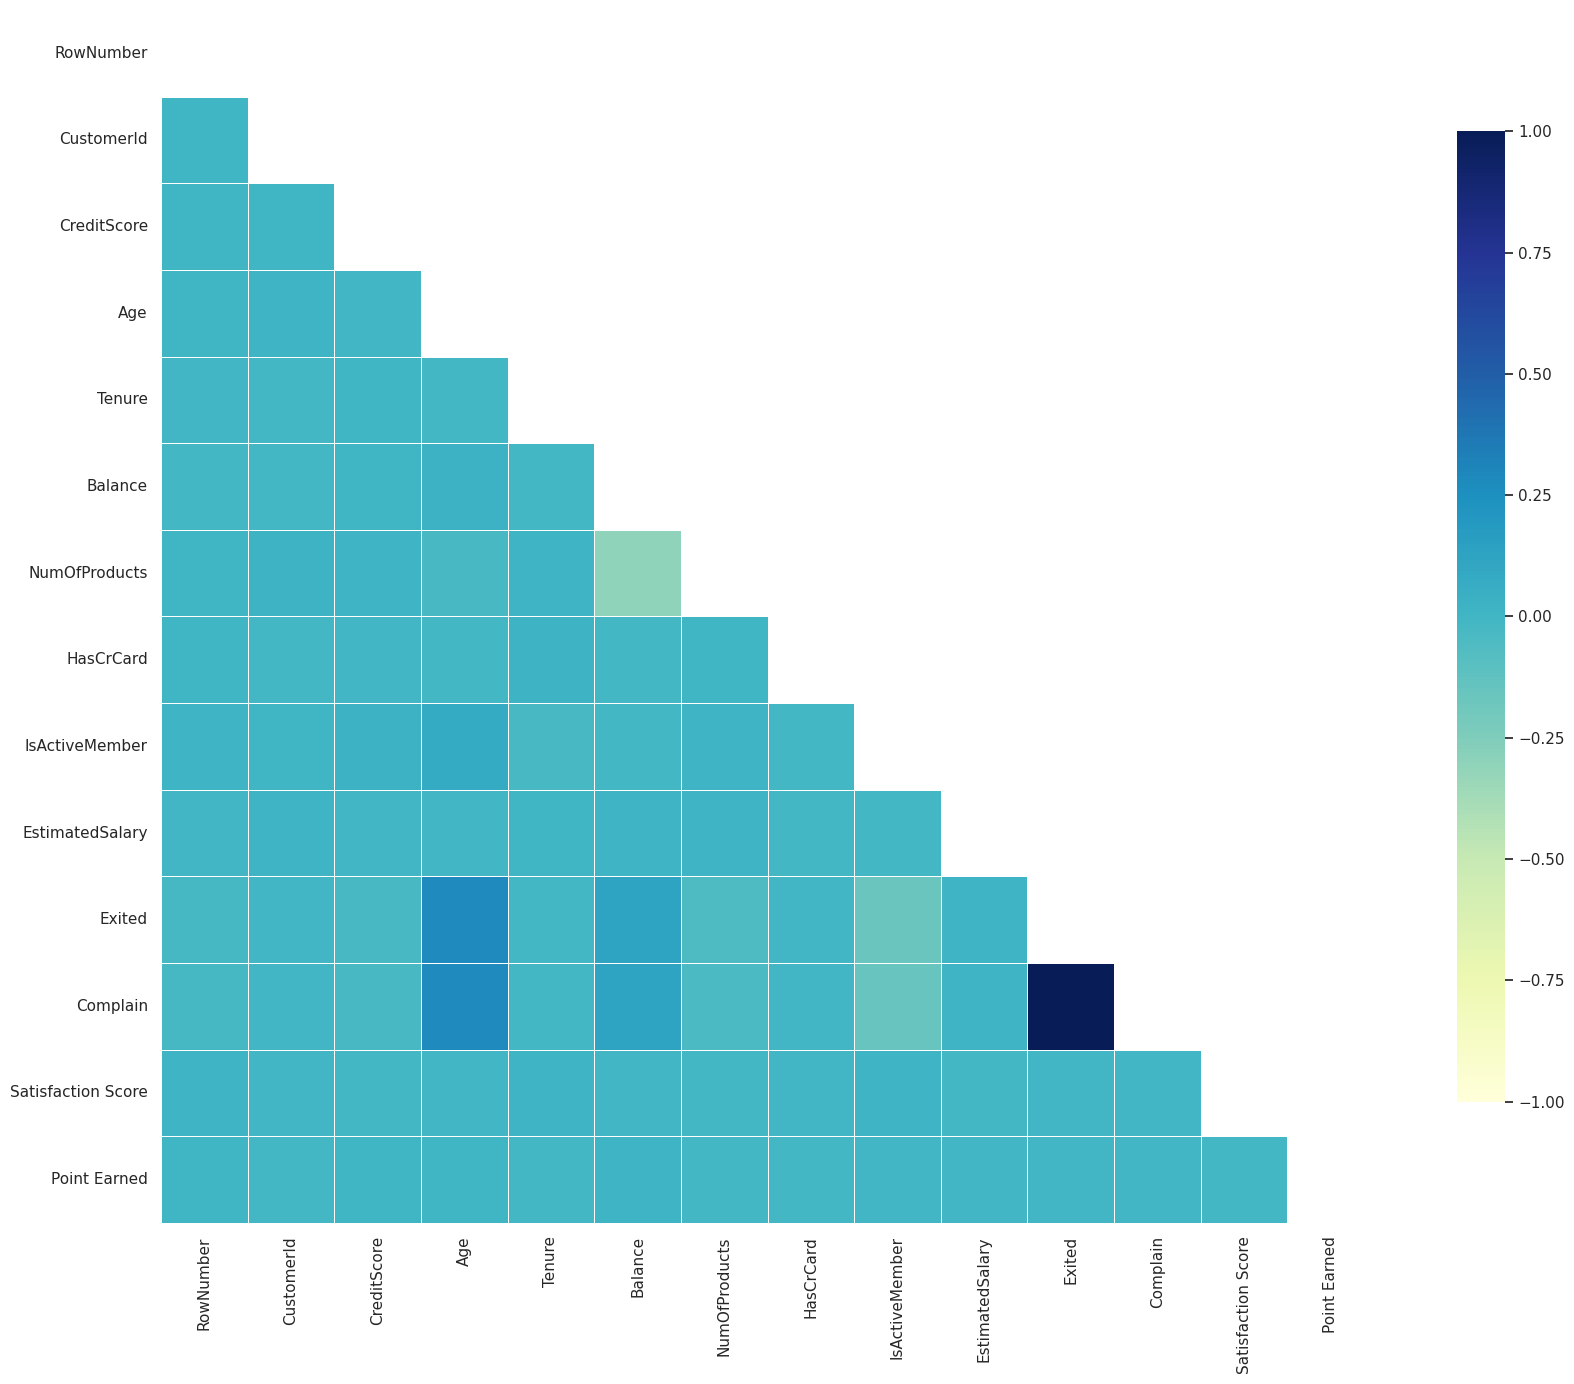

In [155]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
cr = num_cols.corr()
mask = np.triu(np.ones_like(cr, dtype=bool))

plt.figure(figsize=(18, 14))
ax = sns.heatmap(
    cr,
    mask=mask,
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(
    "./_attachments/img/correlacion_numericas_piramide.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### <span id="se25"></span> **2.5 Data visualization**

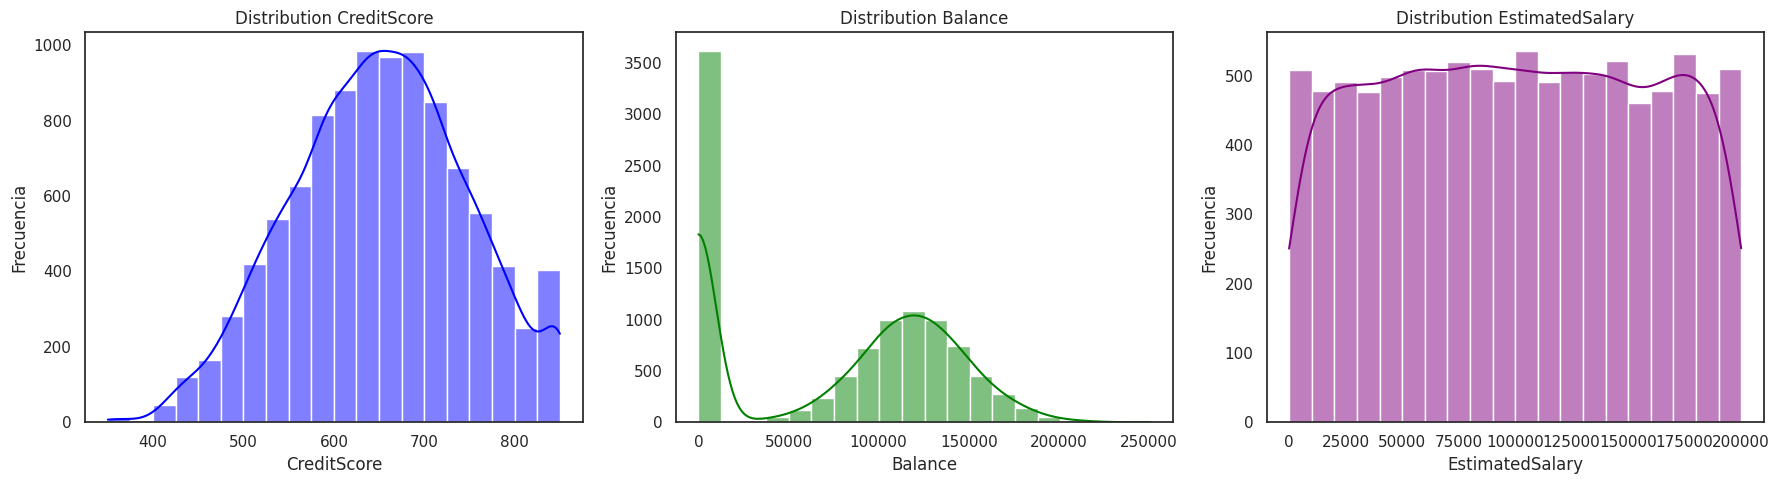

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CreditScore
sns.histplot( df['CreditScore'], kde=True, bins=20, color='blue', ax=axes[0]
             )
axes[0].set_title("Distribution CreditScore")
axes[0].set_xlabel("CreditScore")
axes[0].set_ylabel("Frecuencia")

# Balance
sns.histplot(df['Balance'], kde=True, bins=20, color='green', ax=axes[1])
axes[1].set_title("Distribution Balance")
axes[1].set_xlabel("Balance")
axes[1].set_ylabel("Frecuencia")

# EstimatedSalary
sns.histplot( df['EstimatedSalary'], kde=True, bins=20, color='purple', ax=axes[2])
axes[2].set_title("Distribution EstimatedSalary")
axes[2].set_xlabel("EstimatedSalary")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

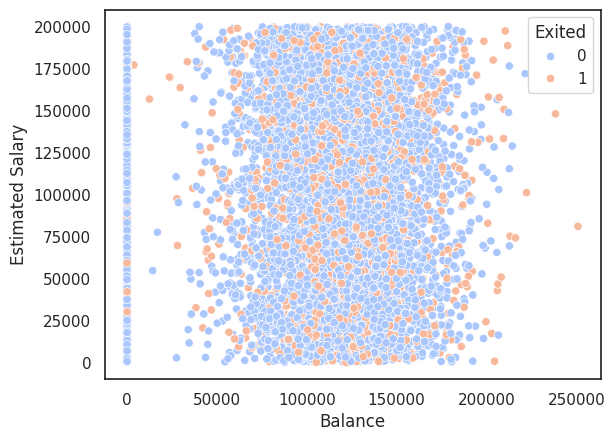

In [157]:
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=df, palette='coolwarm')
plt.xlabel("Balance")
plt.ylabel("Estimated Salary")
plt.legend(title="Exited")
plt.show()

### <span id="sec26"></span> **2.6 Analysis of categorical variables**

In [158]:
categorical_cols = [
    'Geography',
    'Gender',
    'HasCrCard',
    'IsActiveMember',
    'Complain',
    'Card Type',
    'Satisfaction Score',
    'Exited'
]

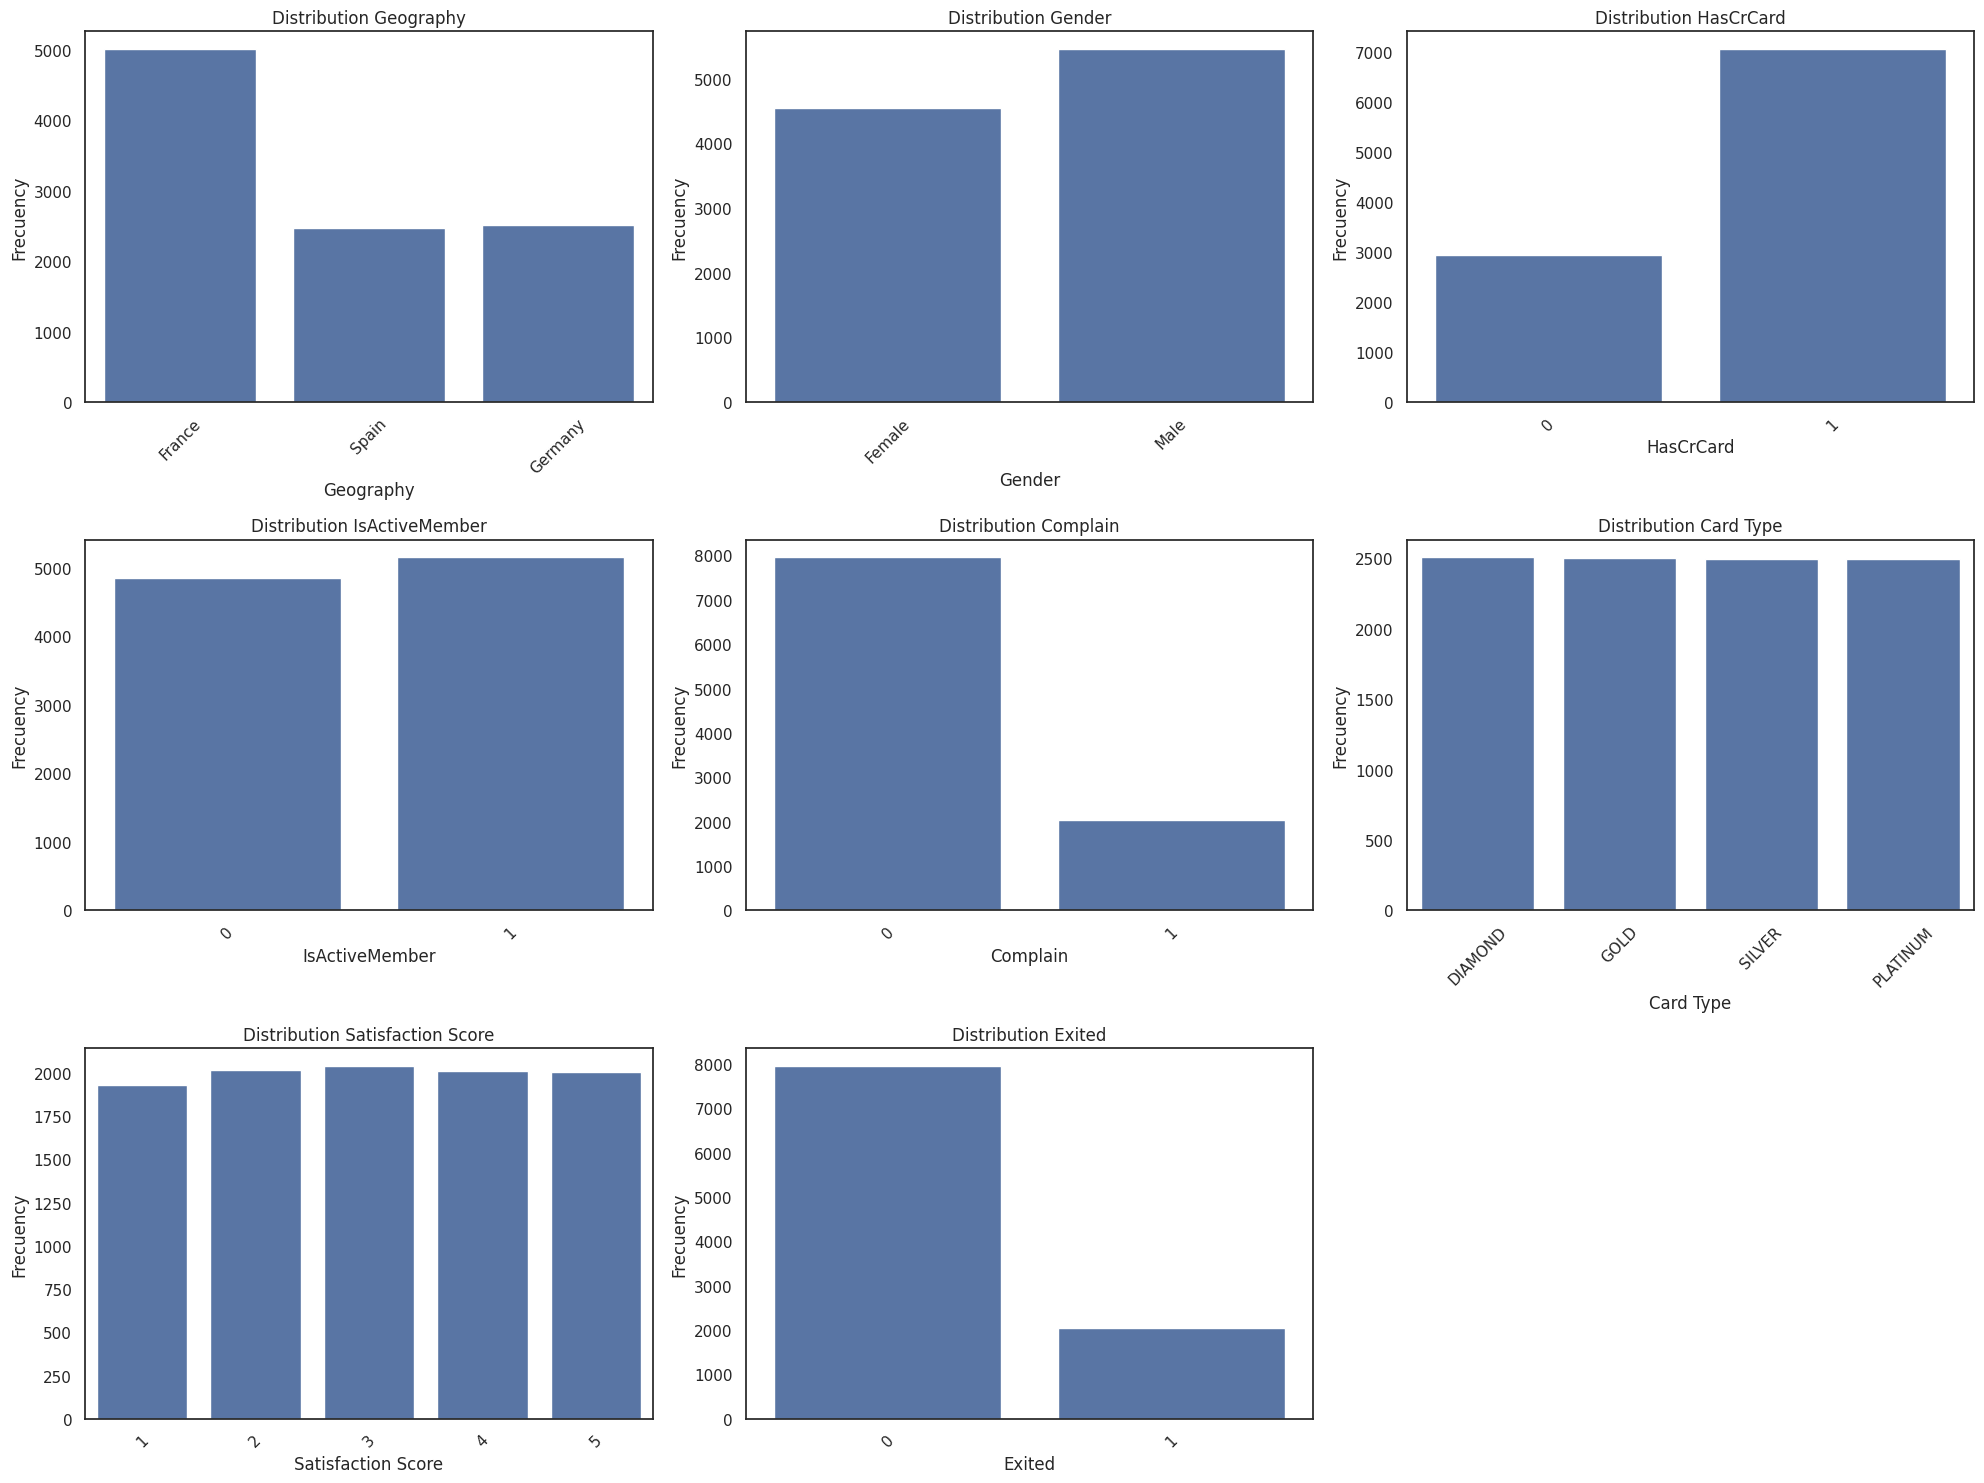

In [159]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuency')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

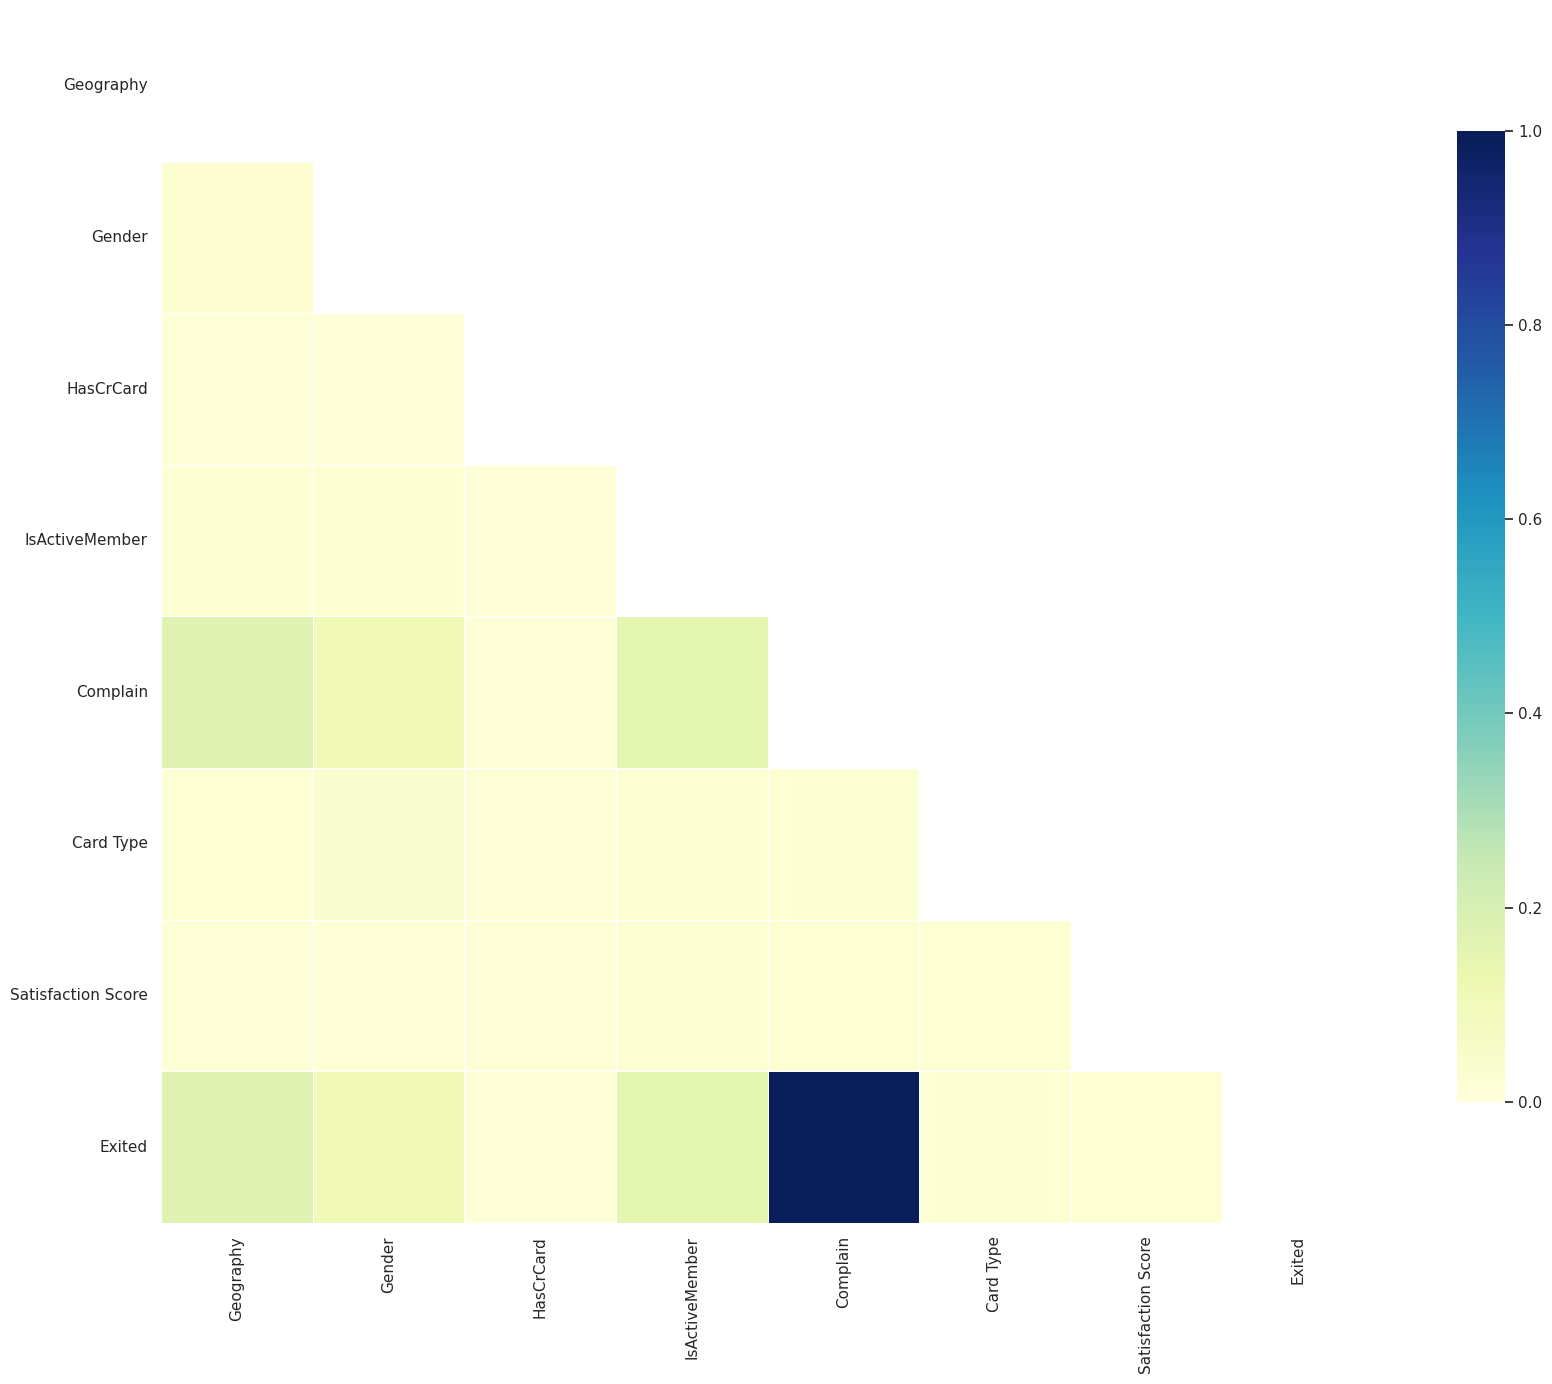

In [160]:
cat_df = df[categorical_cols]
assoc_cat = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))),
    index=categorical_cols,
    columns=categorical_cols
)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        assoc_cat.loc[col1, col2] = cramers_v(cat_df[col1], cat_df[col2])

mask = np.triu(np.ones_like(assoc_cat, dtype=bool))

sns.set(style="white")

plt.figure(figsize=(18, 14))
ax = sns.heatmap(
    assoc_cat,
    mask=mask,
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=0, vmax=1
)


plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(
    "./_attachments/img/asociacion_categoricas_piramide.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


## <span id="sec3"></span> **3. Preparation of the Data Set and Variables**

### <span id="sec31"></span> **3.1 Elimination of Non-Relevant Variables**
In order to avoid bias and overfitting, a new data set called df_transformed was created, eliminating the variables RowNumber, CustomerId and Surname, which correspond to identifiers without predictive value. This transformation allows the original dataset to be preserved and facilitates the reproducibility of the analysis.

In [161]:
cols_to_drop = [
    'RowNumber',
    'CustomerId',
    'Surname'
]
df_transformed = df.drop(columns=cols_to_drop)

print("Original:", df.shape)
print("Transformed:", df_transformed.shape)
print(df_transformed.columns)


Original: (10000, 18)
Transformed: (10000, 15)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


### <span id="sec32"></span> **3.2 Handling Missing Data**
The dataset does not present missing values, therefore no technique is applied to correct

In [162]:
df_transformed.isnull().any()


CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

## <span id="sec4"></span> **4. Variable transformations**

### <span id="sec41"></span> **4.1 Transformations Table**

### <span id="sec42"></span> **4.2 Pipeline Design**
Global standardization using StandardScaler was applied subsequent to all coding transformations, so that all variables including those derived from one-hot coding were centered at zero mean and unit standard deviation. This approach guarantees homogeneous scaling, especially suitable for distance-based models and neural networks.

In [163]:
numeric_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary', 'Point Earned'
]
ordinal_features = ['Satisfaction Score']
nominal_features = ['Geography', 'Gender', 'Card Type']
binary_features = ['HasCrCard', 'IsActiveMember', 'Complain']

In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('ord', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]), ordinal_features),
        ('bin', 'passthrough', binary_features),
        ('nom', OneHotEncoder( handle_unknown='ignore'), nominal_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('scaler', StandardScaler())
])


pipeline

,steps,"[('preprocess', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### <span id="sec43"></span> **4.3 Variable transformation stage**

In [165]:

X = df_transformed.drop(columns=[
    'Exited'
])

y = df_transformed['Exited']
X_transformed = pipeline.fit_transform(X)
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
feature_names = [
    name.split('__')[-1] for name in feature_names
]



In [166]:
#df_without_tags = pd.DataFrame(
#    X_transformed,
#)
#df_without_tags.to_csv(
#    "_attachments/datasets/customer_churn_transformed_without_tags.csv",
#    index=False
#)
#df_without_tags.head()



In [167]:
df_with_tags = pd.DataFrame(
    X_transformed,
    columns=feature_names
)
df_with_tags['Exited'] = y.values

df_with_tags.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned,Satisfaction Score,HasCrCard,IsActiveMember,...,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,-0.630839,-0.721130,0.646092,0.970243,...,0.997204,-0.578736,-0.573809,1.095988,-1.095988,1.728824,-0.577658,-0.57658,-0.576734,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-0.666251,-0.009816,-1.547768,0.970243,...,-1.002804,-0.578736,1.742740,1.095988,-1.095988,1.728824,-0.577658,-0.57658,-0.576734,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,-1.015942,-0.009816,0.646092,-1.030670,...,0.997204,-0.578736,-0.573809,1.095988,-1.095988,1.728824,-0.577658,-0.57658,-0.576734,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,-1.135457,1.412812,-1.547768,-1.030670,...,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.578428,1.731128,-0.57658,-0.576734,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,-0.803472,1.412812,0.646092,0.970243,...,-1.002804,-0.578736,1.742740,1.095988,-1.095988,-0.578428,1.731128,-0.57658,-0.576734,0


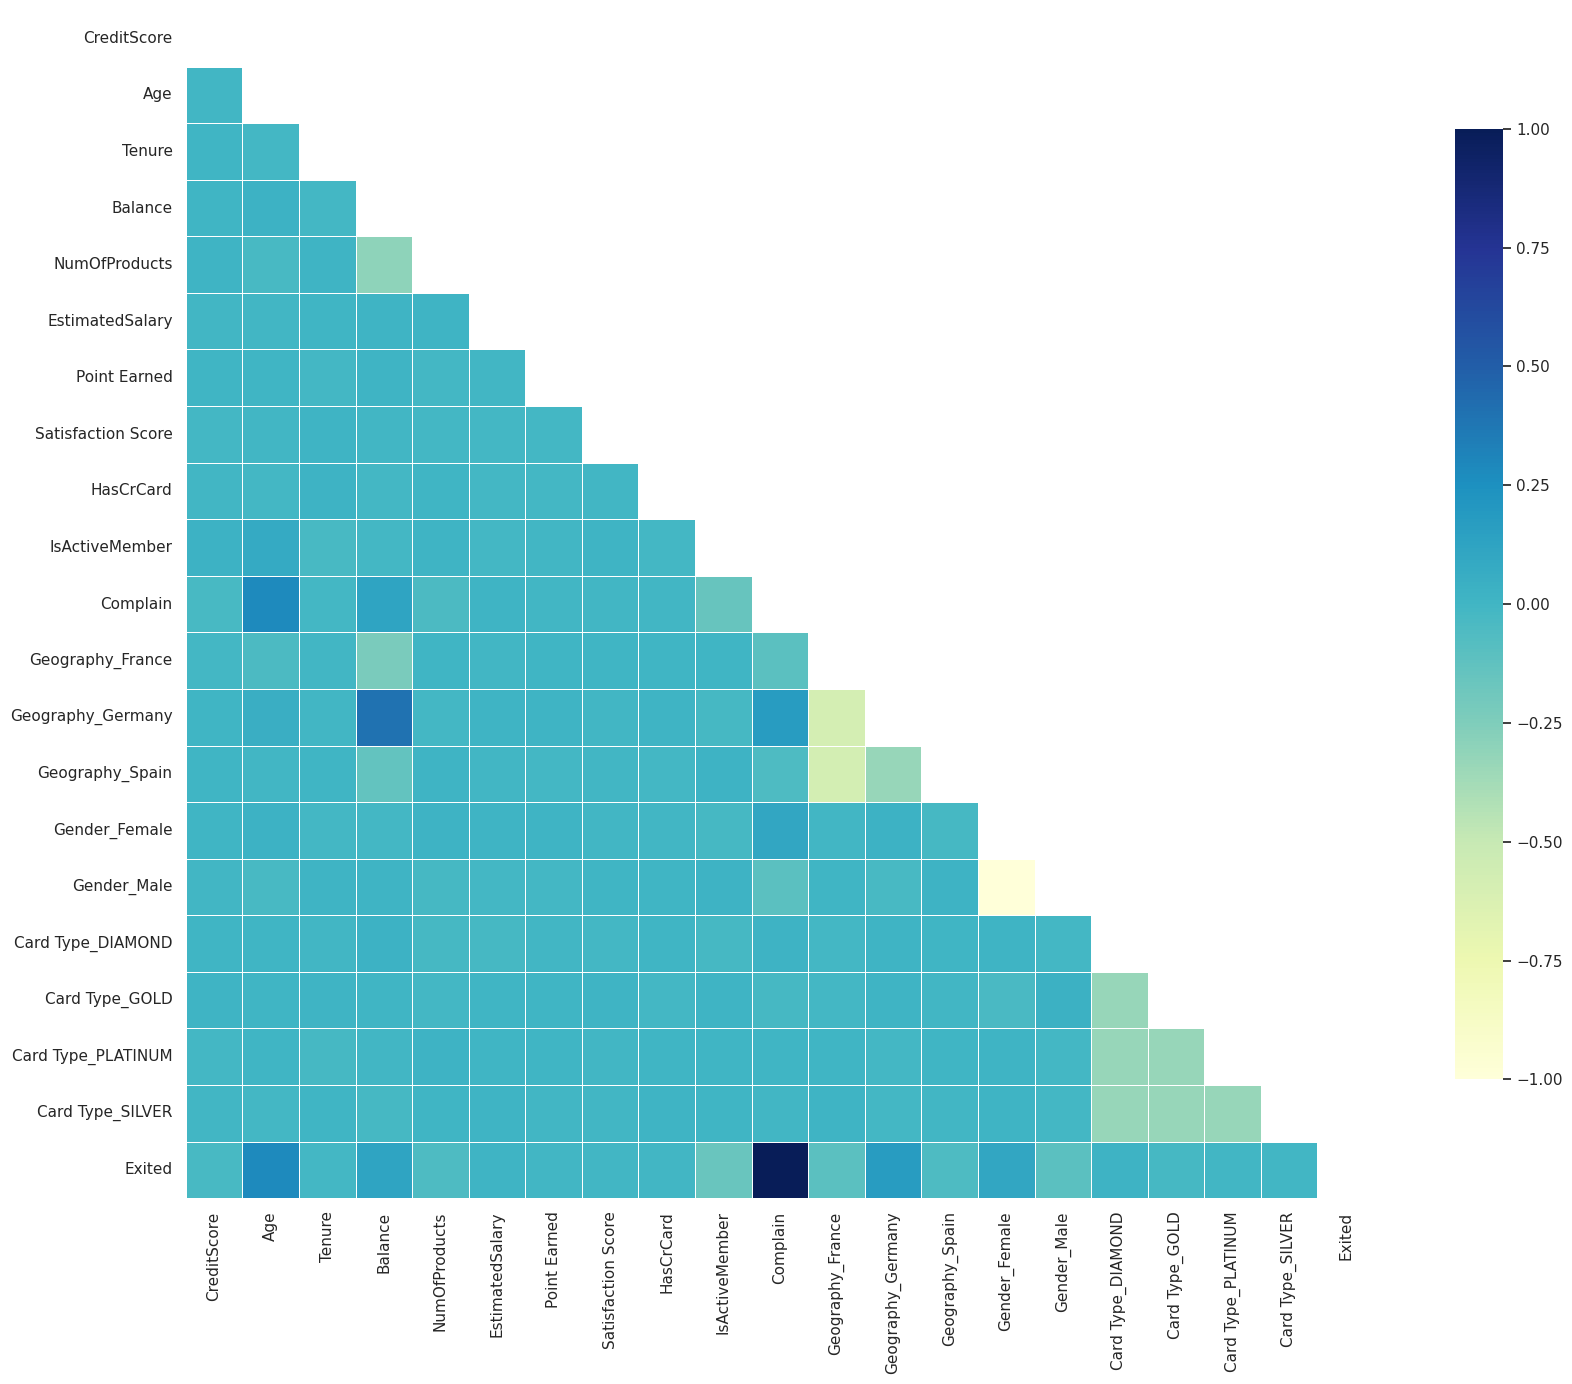

In [168]:
corr = df_with_tags.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style="white")

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    mask=mask,
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(
    "_attachments/img/correlacion_completa_con_tags_piramide.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### <span id="sec45"></span> **4.5 Downloads**

In [169]:
df_with_tags.to_csv(
    "_attachments/datasets/customer_churn_transformed_with_tags.csv",
    index=False
)